## Including the Libraries

In [1]:
# Load libraries for numerical operations
import numpy as np

# Load libraries for data manipulation and analysis
import pandas as pd 

# Load libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load libraries for data preprocessing
from sklearn.preprocessing import StandardScaler

# Load libraries for data exploration
from pandas.plotting import scatter_matrix

# Load libraries for data splitting
from sklearn.model_selection import train_test_split


## Data Investigation

In [2]:
# Load data from the CSV file into a DataFrame
data = pd.read_csv("car data.csv")


In [3]:
# Get the dimensions (number of rows and columns) of the DataFrame
data.shape


(301, 9)

In [4]:
# Get the column labels of the DataFrame
data.columns


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
# Display a concise summary of the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# Display the first few rows of the DataFrame
data.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
# Display the last few rows of the DataFrame
data.tail()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [8]:
# Scaling Numeric Values to Real Currency Values
data['Selling_Price'] = data['Selling_Price'] * 100000
data['Present_Price'] = data['Present_Price'] * 100000


In [9]:
# Dataset Overview
data.describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,3.010000e+02,3.010000e+02,301.000000,301.000000
mean,2013.627907,4.661296e+05,7.628472e+05,36947.205980,0.043189
std,2.891554,5.082812e+05,8.644115e+05,38886.883882,0.247915
min,2003.000000,1.000000e+04,3.200000e+04,500.000000,0.000000
25%,2012.000000,9.000000e+04,1.200000e+05,15000.000000,0.000000
50%,2014.000000,3.600000e+05,6.400000e+05,32000.000000,0.000000
75%,2016.000000,6.000000e+05,9.900000e+05,48767.000000,0.000000
max,2018.000000,3.500000e+06,9.260000e+06,500000.000000,3.000000


In [10]:
# Summary Statistics of Categorical Columns
data.describe(include='object')


,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [11]:
# Display the sum of null values in every column in data
data.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
# Occurrences of Car Names
pd.DataFrame({'Car_Name': data['Car_Name'].value_counts()})


,Car_Name
Car_Name,
city,26
corolla altis,16
verna,14
fortuner,11
brio,10
...,...
Honda CB Trigger,1
Yamaha FZ S,1
Bajaj Pulsar 135 LS,1


In [13]:
# Occurrences of Fuel Types
pd.DataFrame({'Fuel_Type': data['Fuel_Type'].value_counts()})


,Fuel_Type
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


In [14]:
# Occurrences of Seller Types
pd.DataFrame({'Seller_Type': data['Seller_Type'].value_counts()})


,Seller_Type
Seller_Type,
Dealer,195
Individual,106


In [15]:
# Occurrences of Transmission Types
pd.DataFrame({'Transmission': data['Transmission'].value_counts()})


,Transmission
Transmission,
Manual,261
Automatic,40


In [16]:
# Occurrences of Owner Categories
pd.DataFrame({'Owner': data['Owner'].value_counts()})


,Owner
Owner,
0,290
1,10
3,1


In [17]:
# Retrieve the row(s) with the highest selling price
data[data['Selling_Price'] == data['Selling_Price'].max()]


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,land cruiser,2010,3500000.0,9260000.0,78000,Diesel,Dealer,Manual,0


In [18]:
# Retrieve the row(s) with the lowest selling price
data[data['Selling_Price'] == data['Selling_Price'].min()]


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
200,Bajaj Pulsar 150,2006,10000.0,75000.0,92233,Petrol,Individual,Manual,0


In [19]:
# Removing Car_Name Column from the Dataset
data.drop(data.columns[0], axis=1, inplace=True)


In [20]:
# Display the first few rows of the DataFrame
data.head()


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,335000.0,559000.0,27000,Petrol,Dealer,Manual,0
1,2013,475000.0,954000.0,43000,Diesel,Dealer,Manual,0
2,2017,725000.0,985000.0,6900,Petrol,Dealer,Manual,0
3,2011,285000.0,415000.0,5200,Petrol,Dealer,Manual,0
4,2014,460000.0,687000.0,42450,Diesel,Dealer,Manual,0


## Data Preprocessing

In [21]:
# Adding a new column 'Current_Year' and assigning the value 2024 to all rows
data['Current_Year'] = 2024


In [22]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,335000.0,559000.0,27000,Petrol,Dealer,Manual,0,2024
1,2013,475000.0,954000.0,43000,Diesel,Dealer,Manual,0,2024
2,2017,725000.0,985000.0,6900,Petrol,Dealer,Manual,0,2024
3,2011,285000.0,415000.0,5200,Petrol,Dealer,Manual,0,2024
4,2014,460000.0,687000.0,42450,Diesel,Dealer,Manual,0,2024


In [23]:
# Calculate the age of the cars in years
data['number of years'] = data['Current_Year'] - data['Year']


In [24]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,number of years
0,2014,335000.0,559000.0,27000,Petrol,Dealer,Manual,0,2024,10
1,2013,475000.0,954000.0,43000,Diesel,Dealer,Manual,0,2024,11
2,2017,725000.0,985000.0,6900,Petrol,Dealer,Manual,0,2024,7
3,2011,285000.0,415000.0,5200,Petrol,Dealer,Manual,0,2024,13
4,2014,460000.0,687000.0,42450,Diesel,Dealer,Manual,0,2024,10


In [25]:
# Removing the 'Current_Year' and 'Year' columns from the DataFrame
data.drop(['Current_Year', 'Year'], axis=1, inplace=True)


In [26]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,number of years
0,335000.0,559000.0,27000,Petrol,Dealer,Manual,0,10
1,475000.0,954000.0,43000,Diesel,Dealer,Manual,0,11
2,725000.0,985000.0,6900,Petrol,Dealer,Manual,0,7
3,285000.0,415000.0,5200,Petrol,Dealer,Manual,0,13
4,460000.0,687000.0,42450,Diesel,Dealer,Manual,0,10


In [27]:
# Perform one-hot encoding for categorical variables
data = pd.get_dummies(data, drop_first=True)


In [28]:
data.head(10)

,Selling_Price,Present_Price,Kms_Driven,Owner,number of years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,335000.0,559000.0,27000,0,10,False,True,False,True
1,475000.0,954000.0,43000,0,11,True,False,False,True
2,725000.0,985000.0,6900,0,7,False,True,False,True
3,285000.0,415000.0,5200,0,13,False,True,False,True
4,460000.0,687000.0,42450,0,10,True,False,False,True
5,925000.0,983000.0,2071,0,6,True,False,False,True
6,675000.0,812000.0,18796,0,9,False,True,False,True
7,650000.0,861000.0,33429,0,9,True,False,False,True
8,875000.0,889000.0,20273,0,8,True,False,False,True
9,745000.0,892000.0,42367,0,9,True,False,False,True


## Relationship Assessment

In [29]:
# Assessing the Relationship Between Variables
data.corr()


,Selling_Price,Present_Price,Kms_Driven,Owner,number of years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
number of years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


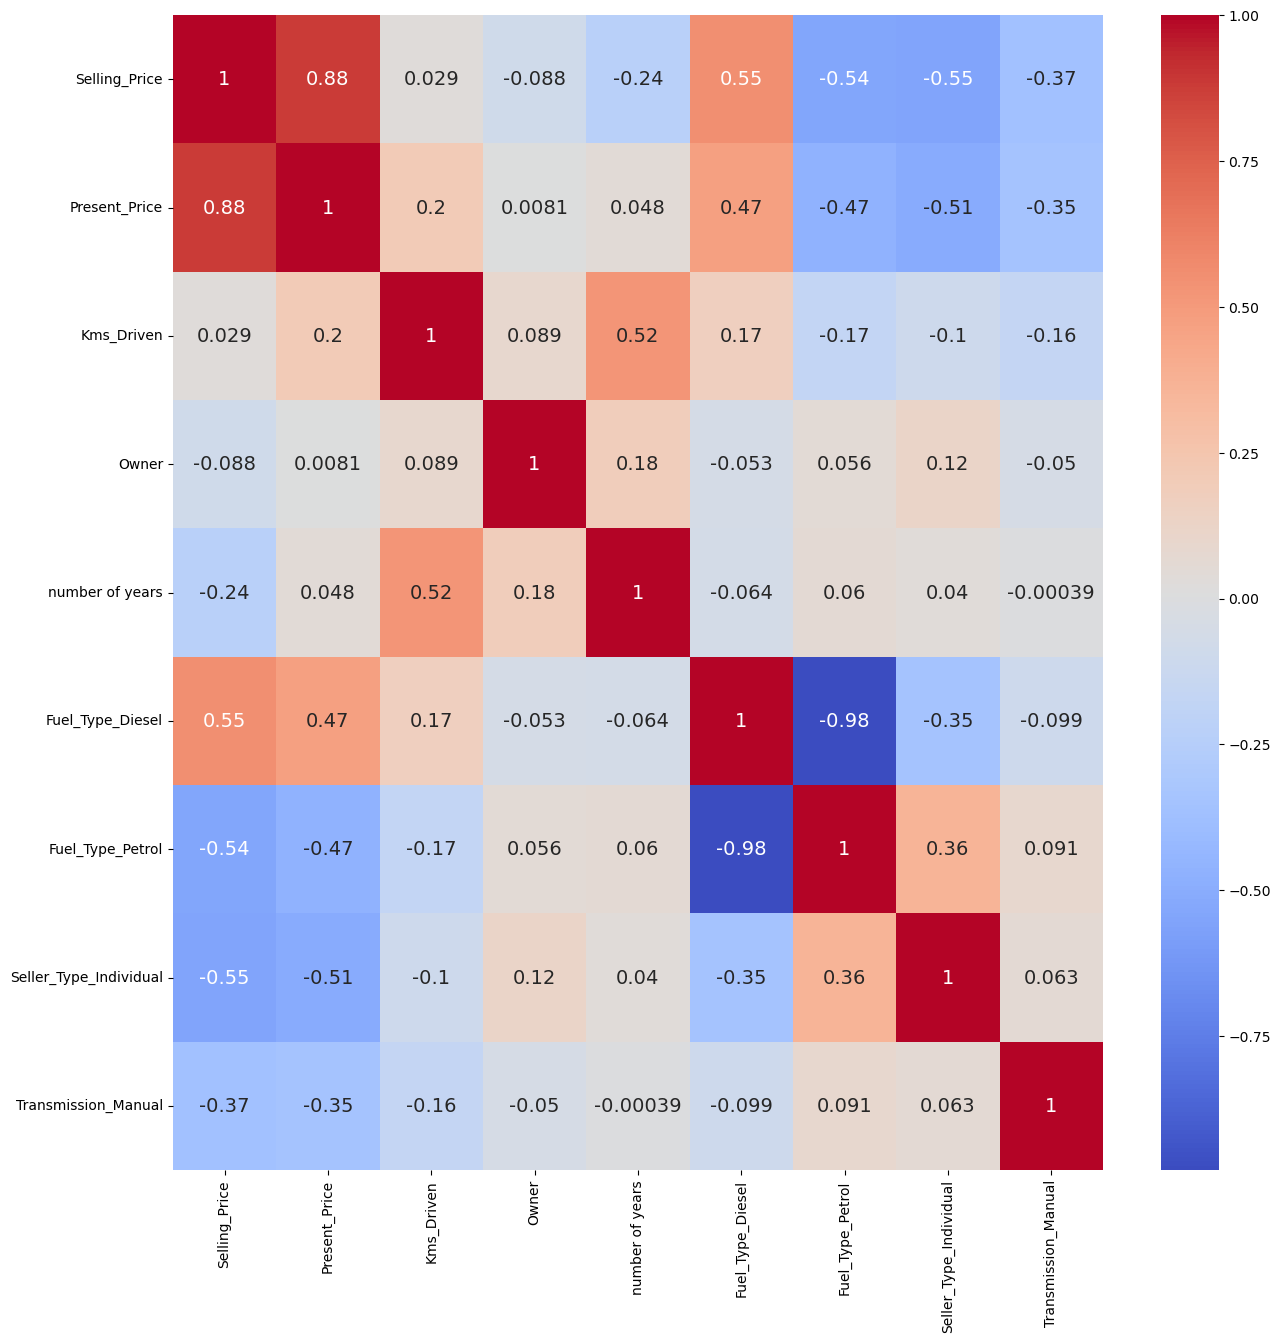

In [30]:
# Visualizing Correlation Matrix with Heatmap
plt.figure(figsize=(15,15))
h = sns.heatmap(data.corr(), annot=True, annot_kws={"size": 14}, cmap="coolwarm")


## Model Deployment

In [31]:
# Extracting features (X) and labels (Y) from the dataset
X = data.iloc[:, 1:]  # Features
Y = data.iloc[:, 0]   # Labels


In [32]:
# Feature Standardization
scaler = StandardScaler()


In [33]:
# Partitioning Dataset into Training and Testing Sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)


In [34]:
# Feature Standardization
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [35]:
# Using Random Forest Regressor and Assessing Performance Metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [36]:
# Train a Random Forest Regressor model
model = RandomForestRegressor()
model.fit(X_train, Y_train)


RandomForestRegressor()

## Accuracy

In [38]:
# Evaluate model performance using mean absolute error, mean squared error, root mean squared error, and R-squared score
from math import sqrt

Y_pred = model.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = sqrt(mse)  # Calculate RMSE
r2 = r2_score(Y_test, Y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)


Mean Absolute Error: 57122.95081967213
Mean Squared Error: 9341037445.90164
Root Mean Squared Error: 96649.0426538289
R-squared Score: 0.9307078086708928


In [39]:
# Evaluating Model Performance
r2_percentage = r2_score(Y_test, Y_pred) * 100
print("The R-squared score of the model is:", r2_percentage)


The R-squared score of the model is: 93.07078086708927


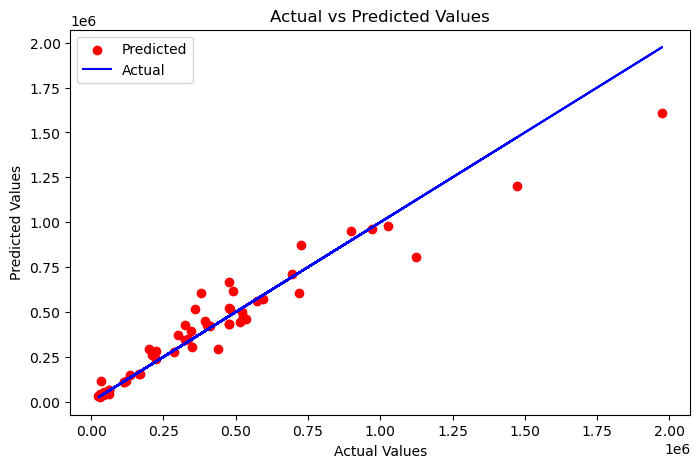

In [40]:
# Scatter Plot of Actual and Predicted Values
plt.figure(figsize=(8,5))
plt.scatter(Y_test, Y_pred, color='red', label='Predicted')

plt.plot(Y_test, Y_test, color='blue', label='Actual')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

plt.show()
